<a href="https://colab.research.google.com/github/Juanje932/Diplomado_IAJUAN/blob/Modulo-4/1_CIFAR10_ALUMNOS_DIPLOMADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10

## ORGANIZAMOS NUESTROS CONJUNTOS DE ENTRENAMIENTO Y PRUEBA

In [2]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

Usamos matplotlib para mostrar algunas imágenes de CIFAR10

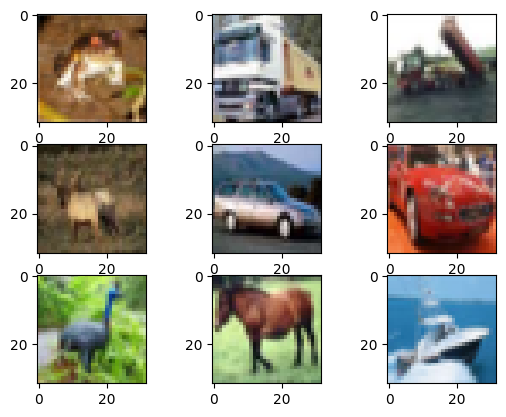

In [3]:
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])

plt.show()

Usamos el método to_categoriacal para asignar a cada imagen una categoría.

In [4]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
print(y_train[15])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


SE BARAJEAN LAS IMÁGENES PARA EL ENTRENAMIENTO Y VALIDACIÓN

In [6]:
import numpy as np

np.random.seed(42)

# barajamos el dataset
permutation = np.random.permutation(x_train.shape[0])
x_train = x_train[permutation]
y_train = y_train[permutation]

# obtenemos el conjunto de validación
num_val = 10000
x_val = x_train[:num_val]
x_train = x_train[num_val:]
y_val = y_train[:num_val]
y_train = y_train[num_val:]

# DEFINIMOS LA ARQUITECTURA CNN

In [8]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
#Segunda capa
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
#aplanado y clasificacion
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

## Definimos los hiperparámetros

In [11]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

train_log = model.fit(x_train, y_train,
                      epochs=10, batch_size=128,
                     validation_data=(x_val,y_val))

Epoch 1/10
313/313 [==============================] - 5s 6ms/step - loss: 6.0114 - acc: 0.2363 - val_loss: 1.7920 - val_acc: 0.3639
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 1.7360 - acc: 0.3794 - val_loss: 1.6036 - val_acc: 0.4500
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 1.6019 - acc: 0.4350 - val_loss: 1.4593 - val_acc: 0.5015
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 1.5031 - acc: 0.4735 - val_loss: 1.4912 - val_acc: 0.4608
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 1.4449 - acc: 0.5006 - val_loss: 1.4331 - val_acc: 0.5212
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 1.4062 - acc: 0.5172 - val_loss: 1.4097 - val_acc: 0.5506
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 1.3752 - acc: 0.5325 - val_loss: 1.3936 - val_acc: 0.5485
Epoch 8/10
313/313 [==============================] - 1s 4ms/step - loss: 1.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 512)               2

# Ejemplo para graficar la perdida y exactitud del entrenamiento y el conjunto de validación

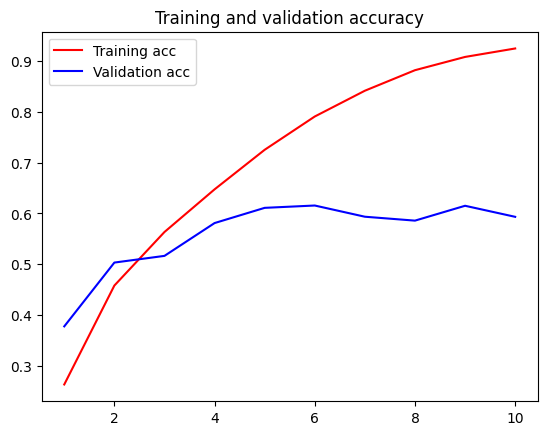

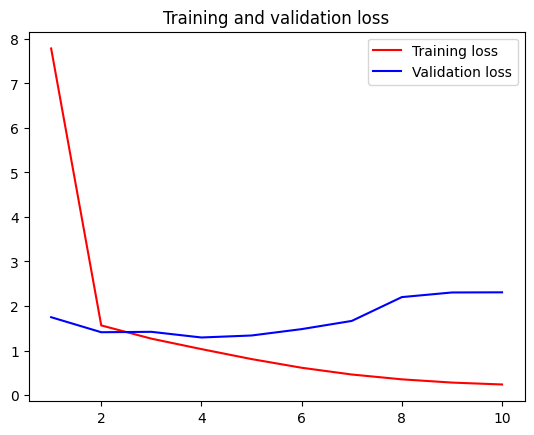

In [ ]:
import matplotlib.pyplot as plt

acc = train_log.history['acc']
val_acc = train_log.history['val_acc']
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# UNA SEGUNDA PROPUESTA DE ARQUITECTURA considerando el Dropout

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

Se definen los Hiperparámetros

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [13]:
train_log = model.fit(x_train, y_train,
                      epochs=100, batch_size=128,
                     validation_data=(x_val, y_val))

Epoch 1/100
313/313 [==============================] - 2s 5ms/step - loss: 1.2838 - acc: 0.5704 - val_loss: 1.3223 - val_acc: 0.5536
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 1.2486 - acc: 0.5802 - val_loss: 1.3809 - val_acc: 0.5366
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 1.2444 - acc: 0.5845 - val_loss: 1.2498 - val_acc: 0.5745
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 1.2289 - acc: 0.5886 - val_loss: 1.1550 - val_acc: 0.6105
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 1.2183 - acc: 0.5953 - val_loss: 1.1691 - val_acc: 0.6027
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 1.2104 - acc: 0.6022 - val_loss: 1.1573 - val_acc: 0.6219
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 1.1981 - acc: 0.6044 - val_loss: 1.1641 - val_acc: 0.6138
Epoch 8/100
313/313 [==============================] - 1s 4ms/step - 

Se grafican los resultados

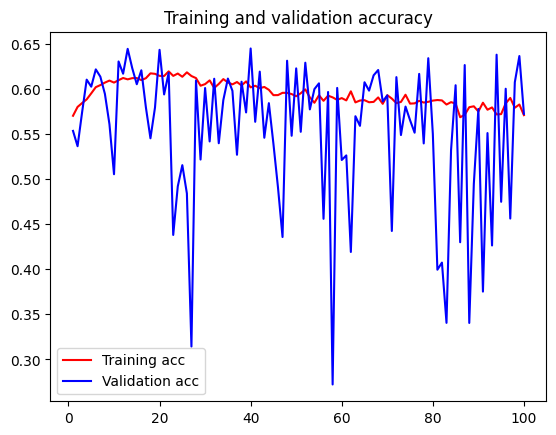

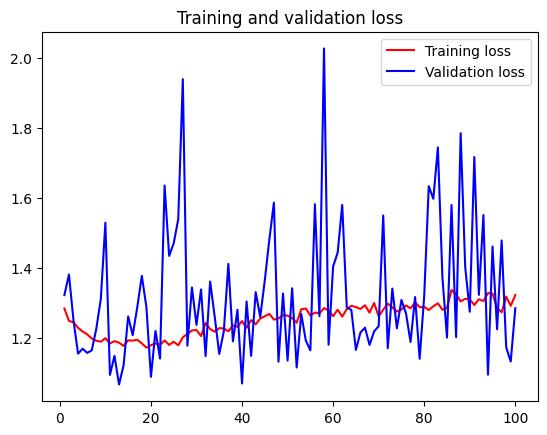

In [14]:
import matplotlib.pyplot as plt

acc = train_log.history['acc']
val_acc = train_log.history['val_acc']
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#EJERCICIO, PROPONGA SU PROPIA ARQUITECTURA Y GRAFIQUE SUS RESULTADOS.